## House Prices - Advanced Regression Techniques

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df = pd.read_csv("../input/house-prices-advanced-regression-techniques/train.csv")

In [9]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df.shape

(1460, 81)

In [11]:
df.isnull().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

<AxesSubplot:>

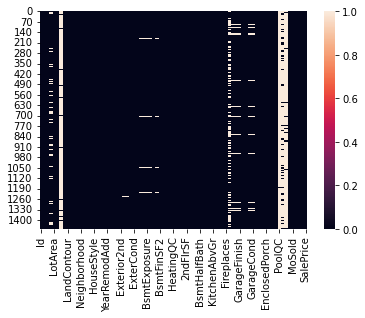

In [12]:
sns.heatmap(df.isnull())

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

In [15]:
df.drop(['Alley'],axis=1,inplace=True)

df.drop(['GarageYrBlt'],axis=1,inplace=True)

df.drop(['PoolQC', 'Fence', 'MiscFeature'],axis=1,inplace=True)

In [16]:
df['BsmtCond'] = df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])

df['BsmtQual'] = df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])

df['FireplaceQu'] = df['FireplaceQu'].fillna(df['FireplaceQu'].mode()[0])

df['GarageType'] = df['GarageType'].fillna(df['GarageType'].mode()[0])

df['GarageFinish'] = df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])

df['GarageQual'] = df['GarageQual'].fillna(df['GarageQual'].mode()[0])

df['GarageCond'] = df['GarageCond'].fillna(df['GarageCond'].mode()[0])

df['MasVnrType'] = df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])

df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

df['BsmtExposure'] = df['BsmtExposure'].fillna(df['BsmtExposure'].mode()[0])

df['BsmtFinType1'] = df['BsmtFinType1'].fillna(df['BsmtFinType1'].mode()[0])

df['BsmtFinType2'] = df['BsmtFinType2'].fillna(df['BsmtFinType2'].mode()[0])

df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [17]:
df.drop(['Id'],axis=1,inplace=True)

In [18]:
c=[]
for i in df:
    if df[i].dtypes==object:
            c.append(i)
c

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [19]:
len(c)

39

In [20]:
#df_dc = pd.get_dummies(df, columns=['Type_of_Customers?','MobileWeb_or_Web','Where_Are_They_comming_from?','Which_Place_in_India?'], drop_first=True)

In [21]:
def cat_to_num(df_dc):
    df_final=final_df
    i=0
    for fields in df_dc:
        
        print(fields)
        df1=pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final=df1.copy()
        else:
            
            df_final=pd.concat([df_final,df1],axis=1)
        i=i+1
       
        
    df_final=pd.concat([final_df,df_final],axis=1)
        
    return df_final

In [22]:
main_df=df.copy()

In [23]:

## Combine Test Data 

test_df=pd.read_csv('../input/formulated/formulatedtest.csv')

In [24]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,120,0,0,6,2010,WD,Normal
1,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,34,0,0,0,0,0,3,2010,WD,Normal
3,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,36,0,0,0,0,0,6,2010,WD,Normal
4,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,Gtl,...,82,0,0,144,0,0,1,2010,WD,Normal


In [25]:
# test and train dataset columns have 1 or 2 different categories, so concat them first to convert to num cols.
final_df=pd.concat([df,test_df],axis=0)

In [26]:
final_df=cat_to_num(c)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition1
Condition2
BldgType
HouseStyle
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
ExterQual
ExterCond
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
SaleType
SaleCondition


In [27]:
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [28]:
final_df.shape

(2919, 176)

In [29]:
df_Train=final_df.iloc[:1422,:]
df_Test=final_df.iloc[1422:2881,:]

In [30]:
df_Test.drop(['SalePrice'],axis=1,inplace=True)

/opt/conda/lib/python3.7/site-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [31]:
X_train=df_Train.drop(['SalePrice'],axis=1)
y_train=df_Train['SalePrice']

In [32]:
import xgboost
classifier=xgboost.XGBRegressor()
classifier.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [50]:
#hyperparameters
n_estimator = [100, 200, 500, 700, 900, 1100, 1250, 1500]
max_depth = [2, 3, 5, 10, 15]
booster = ['gbtree', 'gblinear']
learning_rate = [0.05, 0.1, 0.15, 0.20]
min_child_weight = [1, 2, 3, 4]
base_score = [0.25, 0.5, 0.75, 1]

#define the grid
hyperparameter_grid = {
    'n_estimator': n_estimator,
    'max_depth': max_depth,
    'booster': booster,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'base_score': base_score
}

In [39]:
regressor=xgboost.XGBRegressor()

In [48]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
#setup random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=regressor,
                              param_distributions=hyperparameter_grid,
                              cv=5, n_iter=50,
                              scoring = 'neg_mean_absolute_error', n_jobs=4,
                              verbose = 5,
                              return_train_score = True,
                              random_state=42)

In [54]:
random_cv.fit(X_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[15:14:20] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 4/5] END base_score=0.25, booster=gblinear, learning_rate=0.1, max_depth=3, min_child_weight=4, n_estimator=900;, score=(train=-18191.605, test=-19750.920) total time=   0.7s
[15:14:21] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                                          reg_alpha=None, reg_lambda=None, ...),
                   n_iter


[CV 5/5] END base_score=0.5, booster=gbtree, learning_rate=0.1, max_depth=3, min_child_weight=1, n_estimator=1250;, score=(train=-10529.543, test=-17186.153) total time=   1.4s

[15:16:01] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[CV 1/5] END base_score=0.5, booster=gblinear, learning_rate=0.2, max_depth=15, min_child_weight=4, n_estimator=900;, score=(train=-18075.869, test=-17118.366) total time=   0.6s
[15:16:02] WARNING: ../src/learner.cc:627: 
Parameters: { "max_depth", "min_child_weight", "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed

In [55]:
random_cv.best_estimator_

XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimator=1500,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [56]:
random_cv.best_params_

{'n_estimator': 1500,
 'min_child_weight': 1,
 'max_depth': 3,
 'learning_rate': 0.15,
 'booster': 'gbtree',
 'base_score': 0.75}

In [61]:
regressor = xgboost.XGBRegressor(n_estimator= 1500,
 min_child_weight= 1,
 max_depth= 3,
 learning_rate= 0.15,
 booster= 'gbtree',
 base_score= 0.75)

In [62]:
regressor.fit(X_train, y_train)

[15:27:11] WARNING: ../src/learner.cc:627: 
Parameters: { "n_estimator" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.75, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.15, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=3, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimator=1500,
             n_estimators=100, n_jobs=0, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=0, ...)

In [63]:
import pickle
filename = 'final_mdl.pkl'
pickle.dump(classifier, open(filename, 'wb'))

In [64]:
y_pred = classifier.predict(df_Test)

In [65]:
y_pred.shape

(1459,)

In [66]:
#submission file
pred=pd.DataFrame(y_pred)
sub_df=pd.read_csv('../input/house-prices-advanced-regression-techniques/sample_submission.csv')
datasets=pd.concat([sub_df['Id'],pred],axis=1)
datasets.columns=['Id','SalePrice']
# datasets.loc[:, 'SalePrice'] = y_pred
datasets.to_csv('submission2.csv', index=False)
display(datasets.head())

,Id,SalePrice
0,1461,141756.390625
1,1462,199611.375000
2,1463,136040.859375
3,1464,150529.984375
4,1465,261119.375000
